In [74]:
###importing the libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import xlrd

In [75]:
##reading the input file
df = pd.read_excel('cleaned_data.xlsx')

In [76]:
df.columns  #this is for the reference of the headings of the columns

Index(['Property_Name', 'Property_id', 'Property_type', 'Property_status',
       'Price_per_unit_area', 'Posted_On', 'Project_URL', 'builder_id',
       'Builder_name', 'Property_building_status', 'City_id', 'City_name',
       'No_of_BHK', 'Locality_ID', 'Locality_Name', 'Longitude', 'Latitude',
       'Price', 'Size', 'Sub_urban_ID', 'Sub_urban_name', 'description',
       'is_furnished', 'listing_domain_score', 'is_plot', 'is_RERA_registered',
       'is_Apartment', 'is_ready_to_move', 'is_commercial_Listing',
       'is_PentaHouse', 'is_studio', 'Listing_Category'],
      dtype='object')

In [77]:
##converting the price to integer from a string since it contains commas
df['Price']=df['Price'].str.replace(',','')#removed all the commas
df['Price']=df['Price'].astype(int)#converted string to integer

## Requirement 1: Divided The properties in three price ranges

<AxesSubplot:title={'center':'Price'}, xlabel='Price ranges', ylabel='Frequency'>

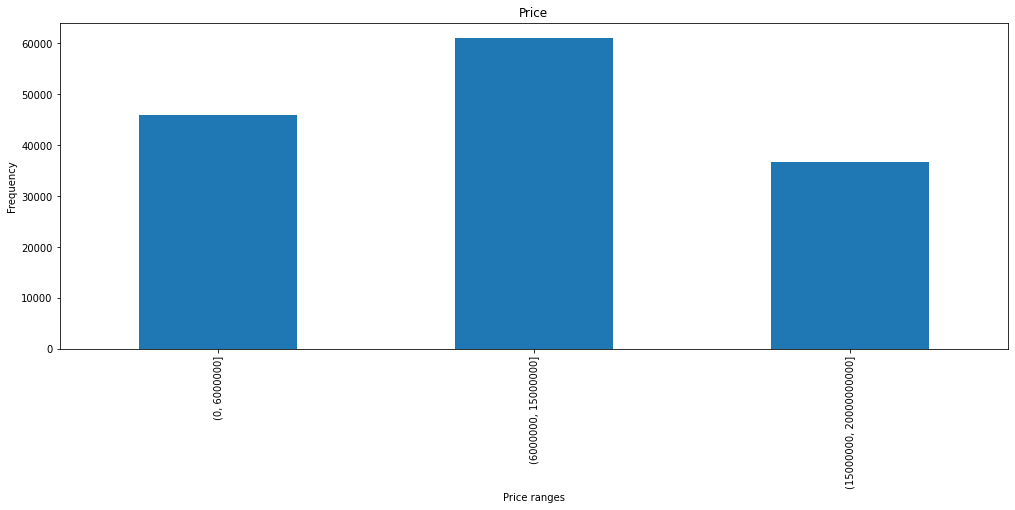

In [78]:
##Graph1: Frequency v/s range
ranges=[0,6000000,15000000,20000000000]##made ranges for convenient plotting
dfg=df.groupby(pd.cut(df['Price'],ranges)).count()['Price']##cut according to the ranges
dfg.plot(kind='bar', title='Price', ylabel='Frequency',xlabel='Price ranges', figsize=(17, 6))##plotting graph

## We chose the price ranges from 0-60 lakhs, 60 lakhs to 1.5 Cr and above 1.5 Cr because the investors will have three budget ranges that are low, mid and high respectively.

## Pie Chart for requirement 1 which shows frequency of the three price ranges

<AxesSubplot:ylabel='Price'>

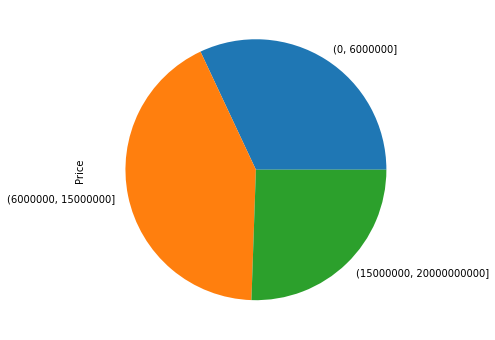

In [79]:
#Graph2 Pie chart of the frequency for various price ranges
dfg.plot(kind='pie',figsize=(17, 6))

## Requirement 2: Ready to move properties in tech emerging cities

In [80]:
B=df.loc[(df['City_id']==2) & (df['Property_status']=='Ready to move')].count()['City_id']
C=df.loc[(df['City_id']==5) & (df['Property_status']=='Ready to move')].count()['City_id']
H=df.loc[(df['City_id']==12) & (df['Property_status']=='Ready to move')].count()['City_id']
print(B) #number of ready to move properties in Bangalore
print(C) #number of ready to move properties in Chennai
print(H) #number of ready to move properties in Hyderabad

10415
8314
4169


<Figure size 1224x360 with 0 Axes>

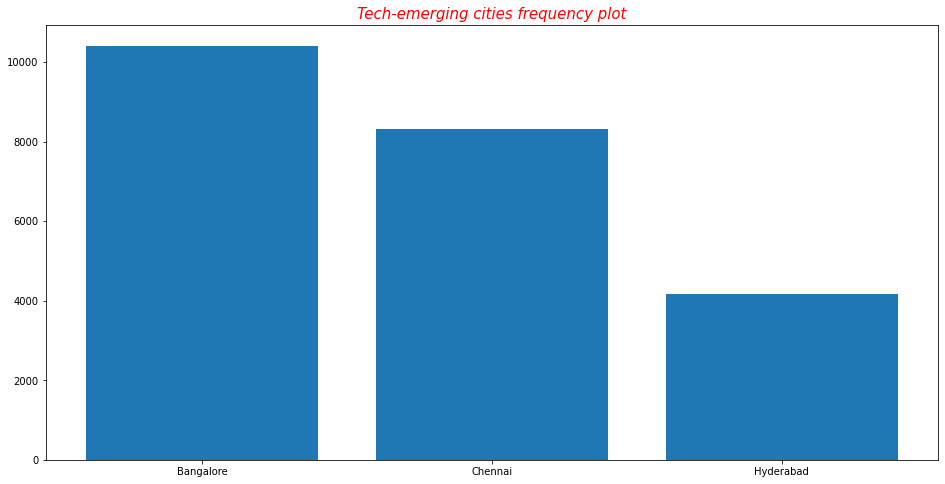

In [81]:
##Graph1 of number of houses available in tech-emerging cities which are ready to move. 
#This is the graph for second question.
x = np.array(["Bangalore", "Chennai", "Hyderabad"])
y = np.array([B,C,H])
plt.figure().set_figwidth(17)
plt.figure().set_figheight(8)
plt.bar(x,y)
plt.title('Tech-emerging cities frequency plot',fontsize=15,
          color="Red",fontstyle='italic')
plt.show()

In [82]:
B1=df.loc[(df['City_id']==2) & (df['Property_status']=='Ready to move')]#Bangalore
C1=df.loc[(df['City_id']==5) & (df['Property_status']=='Ready to move')]#Chennai
H1=df.loc[(df['City_id']==12) & (df['Property_status']=='Ready to move')]#Hyderabad

## Graph plots for each tech-emerging cities (Requirement 2)

<AxesSubplot:title={'center':'Bangalore'}, xlabel='Price ranges', ylabel='Frequency'>

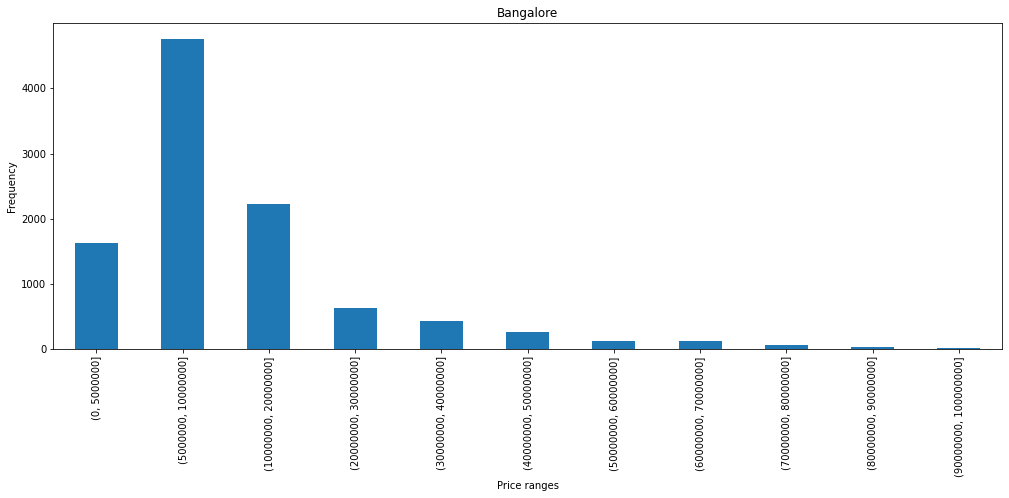

In [83]:
##Graph 2 in which the houses which are located in Bangalore and are readyt o move in different price ranges. 

ranges2=[0,5000000,10000000,20000000,30000000,40000000,50000000,60000000,70000000,80000000,90000000,100000000]
dfg_bangalore=B1.groupby(pd.cut(B1['Price'],ranges2)).count()['Price']##cut according to the ranges
dfg_bangalore.plot(kind='bar', title='Bangalore', ylabel='Frequency',xlabel='Price ranges', figsize=(17, 6))##plotting graph

<AxesSubplot:title={'center':'Chennai'}, xlabel='Price ranges', ylabel='Frequency'>

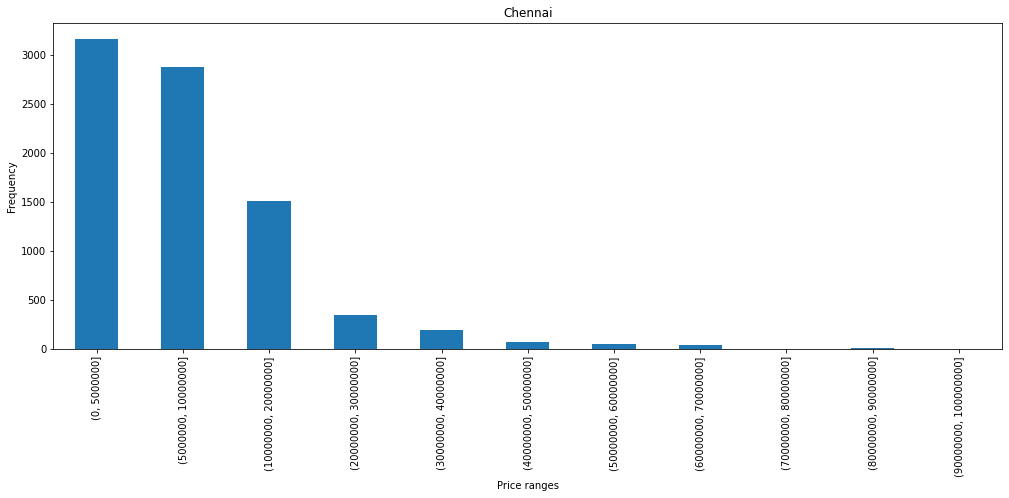

In [84]:
##Graph 3 in which the houses which are located in Chennai and are ready to move in different price ranges. 
##This is the graph for second question
dfg_chennai=C1.groupby(pd.cut(C1['Price'],ranges2)).count()['Price']##cut according to the ranges
dfg_chennai.plot(kind='bar', title='Chennai', ylabel='Frequency',xlabel='Price ranges', figsize=(17, 6))##plotting graph

<AxesSubplot:title={'center':'Hyderabad'}, xlabel='Price ranges', ylabel='Frequency'>

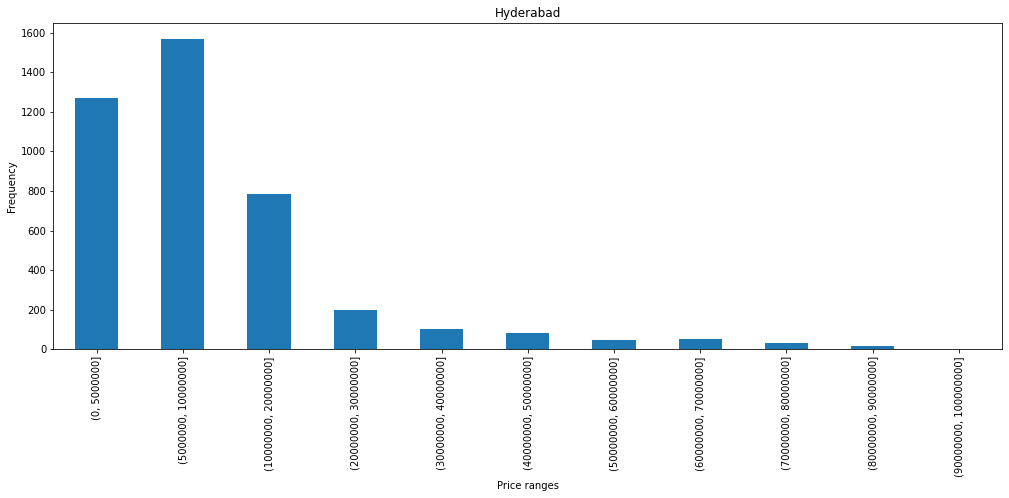

In [85]:
##Graph 3 in which the houses which are located in Hyderabad and are ready to move in different price ranges.
##This is the graph for second question
dfg_hyderabad=H1.groupby(pd.cut(H1['Price'],ranges2)).count()['Price']##cut according to the ranges
dfg_hyderabad.plot(kind='bar', title='Hyderabad', ylabel='Frequency',xlabel='Price ranges', figsize=(17, 6))##plotting graph

## Requirement 3: Large area properties with lower budget

In [86]:
##Properties with Price < 100000000 and Size > 5000 sq ft for investors intersted in large plots with less budget
df['Price_per_unit_area'] = df['Price_per_unit_area'].astype(str)
df['Price_per_unit_area'] = df['Price_per_unit_area'].str.replace(',','')
df['Price_per_unit_area'] = df['Price_per_unit_area'].astype(int)
df['Size'] = df['Size'].str.replace(',','')
df['Size'] = df['Size'].str.replace(' sq ft','')
df['Size'] = df['Size'].astype(float)

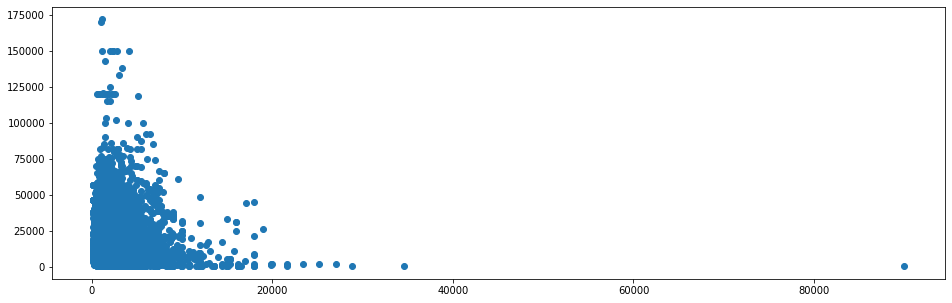

In [87]:
##Graph1 This Graph is a plot for size of the plot vs price of the plot per unit area. 
plt.rcParams['figure.figsize'] = [16,5]
plt.scatter(y=df['Price_per_unit_area'],x=df['Size'])

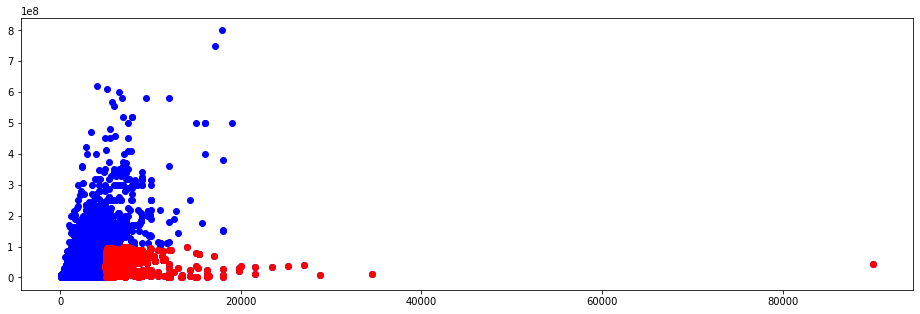

In [88]:
##Graph 3 This Graph is a plot for size of the plot vs the price of the plot. 
##The red dots are larger area properties with relatively lesser budgets.
j=0
Price_a=[]
Size_a=[]  
for i in range(143708):
    if (df['Price'][i]<100000000) & (df['Size'][i]>5000):
        Price_a.append(df['Price'][i])
        Size_a.append(df['Size'][i])
        j=j+1
plt.scatter(y=df['Price'],x=df['Size'],color='blue')
plt.scatter(y=Price_a,x=Size_a,color = 'red')
plt.show()
##The red dots are the investments which satisfies the given requirement

## Requirement 4: Properties in same areas and properties in different areas in same cities

In [89]:
df.groupby(df['City_name']).size()

City_name
Ahmedabad     6612
Bangalore    21019
Chennai      13406
Delhi         7476
Hyderabad     9129
Kolkata      12224
Lucknow       1690
Mumbai       72152
dtype: int64

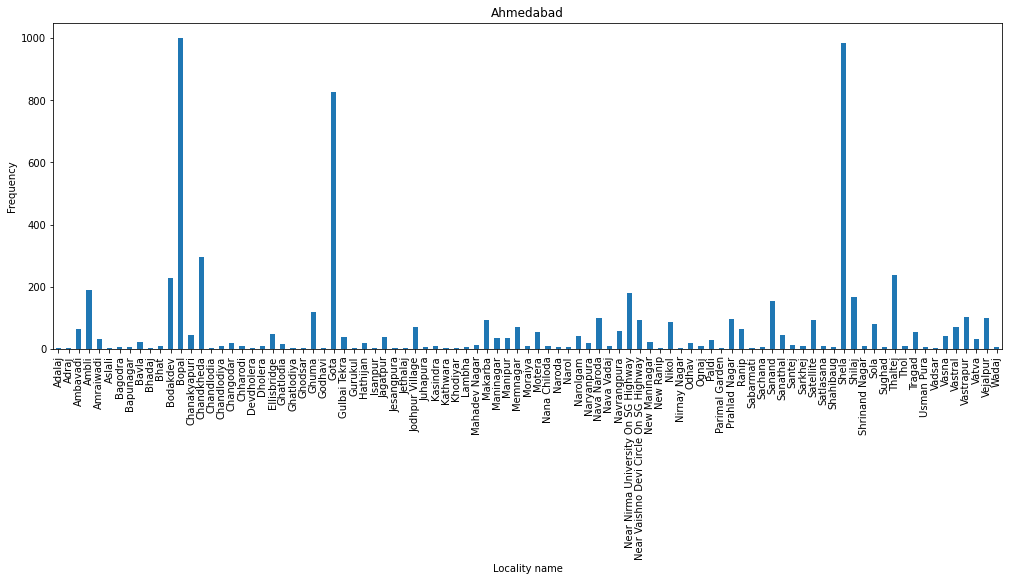

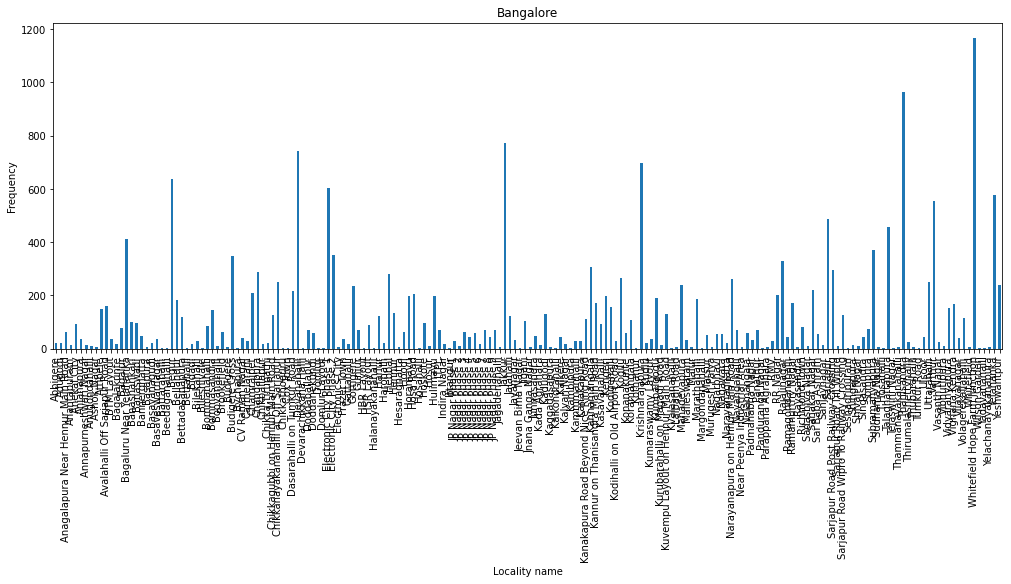

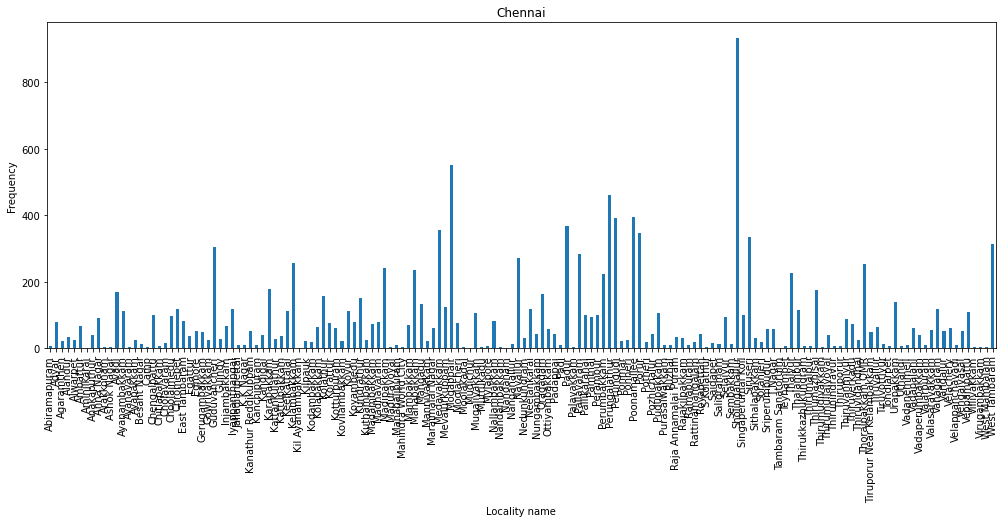

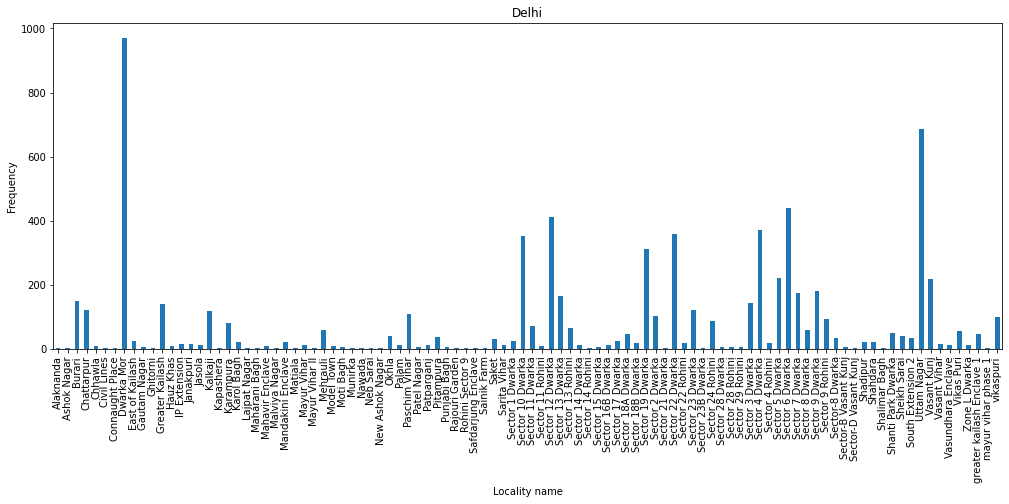

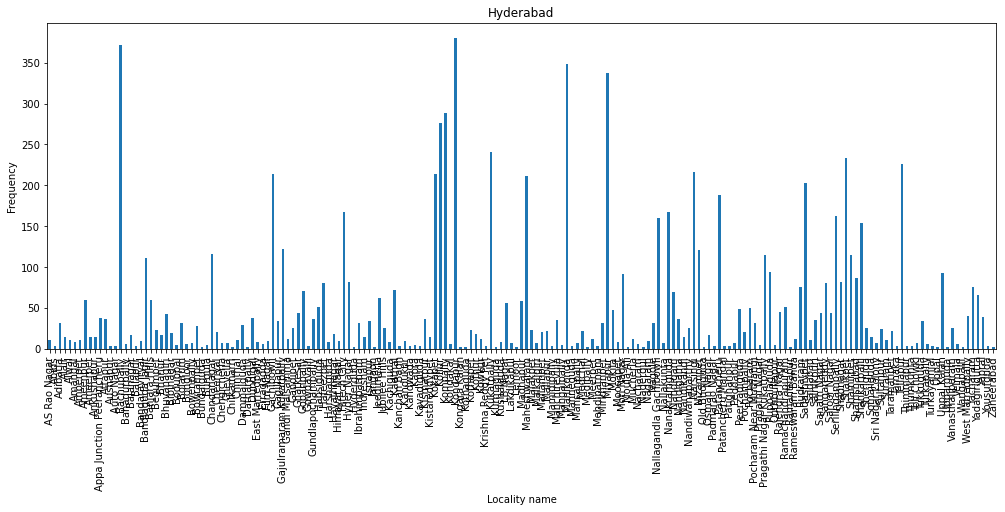

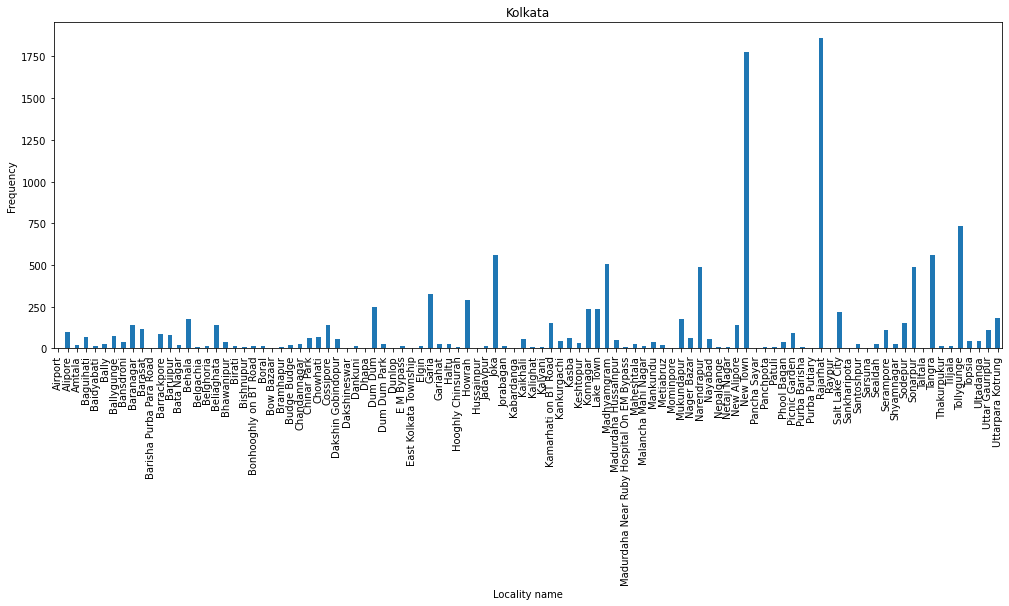

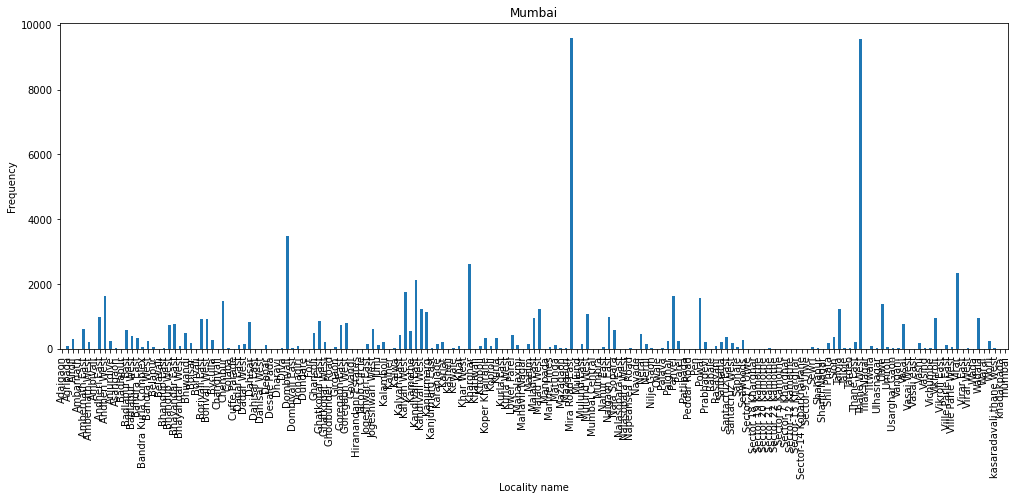

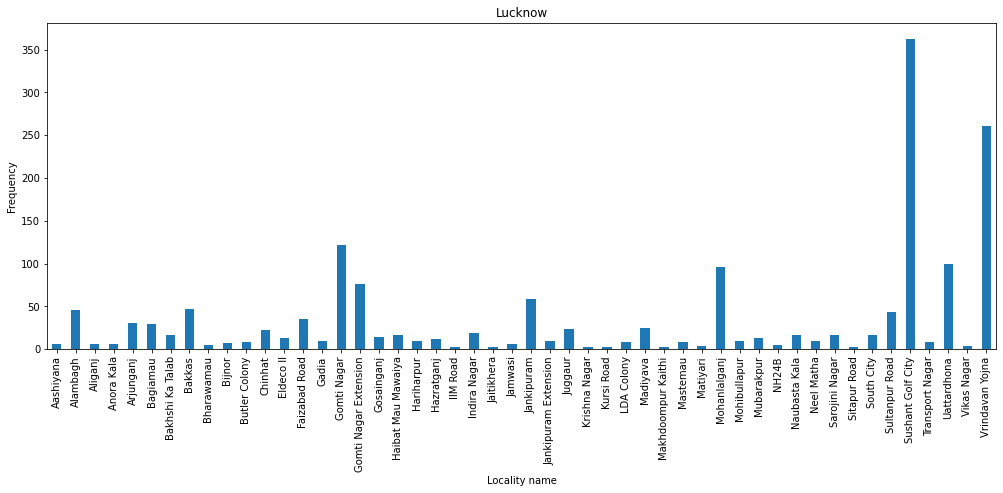

In [90]:
#Graphs of frequency v/s locality for all cities with localities having more tha 1 property 
a_1=df.loc[(df['City_id']==1)]
a_2=df.loc[(df['City_id']==2)]
a_3=df.loc[(df['City_id']==5)]
a_4=df.loc[(df['City_id']==6)]
a_5=df.loc[(df['City_id']==12)]
a_6=df.loc[(df['City_id']==16)]
a_7=df.loc[(df['City_id']==18)]
a_8=df.loc[(df['City_id']==23)]
A_1=a_1.groupby(df['Locality_Name']).size()
A_2=a_2.groupby(df['Locality_Name']).size()
A_3=a_3.groupby(df['Locality_Name']).size()
A_4=a_4.groupby(df['Locality_Name']).size()
A_5=a_5.groupby(df['Locality_Name']).size()
A_6=a_6.groupby(df['Locality_Name']).size()
A_7=a_7.groupby(df['Locality_Name']).size()
A_8=a_8.groupby(df['Locality_Name']).size()

A_1=A_1[(A_1)>1]
A_2=A_2[(A_2)>1]
A_3=A_3[(A_3)>1]
A_4=A_4[(A_4)>1]
A_5=A_5[(A_5)>1]
A_6=A_6[(A_6)>1]
A_7=A_7[(A_7)>1]
A_8=A_8[(A_8)>1]
# plt.rcParams["figure.figsize"] = [1, 5.50]
# plt.rcParams["figure.autolayout"] = True
# fig, axs = plt.subplots(1,2)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(1)
A_1.plot(kind='bar', title='Ahmedabad', ylabel='Frequency',xlabel='Locality name', figsize=(17, 6))##plotting graph
plt.show()
A_2.plot(kind='bar', title='Bangalore', ylabel='Frequency',xlabel='Locality name', figsize=(17, 6))##plotting graph
plt.show()
A_3.plot(kind='bar', title='Chennai', ylabel='Frequency',xlabel='Locality name', figsize=(17, 6))##plotting graph
plt.show()
A_4.plot(kind='bar', title='Delhi', ylabel='Frequency',xlabel='Locality name', figsize=(17, 6))##plotting graph
plt.show()
A_5.plot(kind='bar', title='Hyderabad', ylabel='Frequency',xlabel='Locality name', figsize=(17, 6))##plotting graph
plt.show()
A_6.plot(kind='bar', title='Kolkata', ylabel='Frequency',xlabel='Locality name', figsize=(17, 6))##plotting graph
plt.show()
A_7.plot(kind='bar', title='Mumbai', ylabel='Frequency',xlabel='Locality name', figsize=(17, 6))##plotting graph
plt.show()
A_8.plot(kind='bar', title='Lucknow', ylabel='Frequency',xlabel='Locality name', figsize=(17, 6))##plotting graph
plt.show()

### For investors interested in investing in a locality the areas with higher height in graph i.e. more number of properties would be better whereas for for investors interested in diversifying their portfolios the cities with more localities and properties available in different localities like Bangalore or mumbai are recommended.

## Requirement 5: Investors are interested in knowing the hotspot for their offices in Mumbai and Ahmedabad

In [91]:
A1=df.loc[(df['City_id']==1) & (df['is_Apartment']==0) & (df['is_studio']==0)]#Ahmedabad##since the requirement given
## is search for offices. Therefore, it should be not a studio or apartment.
A1['Price_per_unit_area'].max()

49747

<AxesSubplot:title={'center':'Ahmedabad'}, xlabel='Price per unit areranges', ylabel='Frequency'>

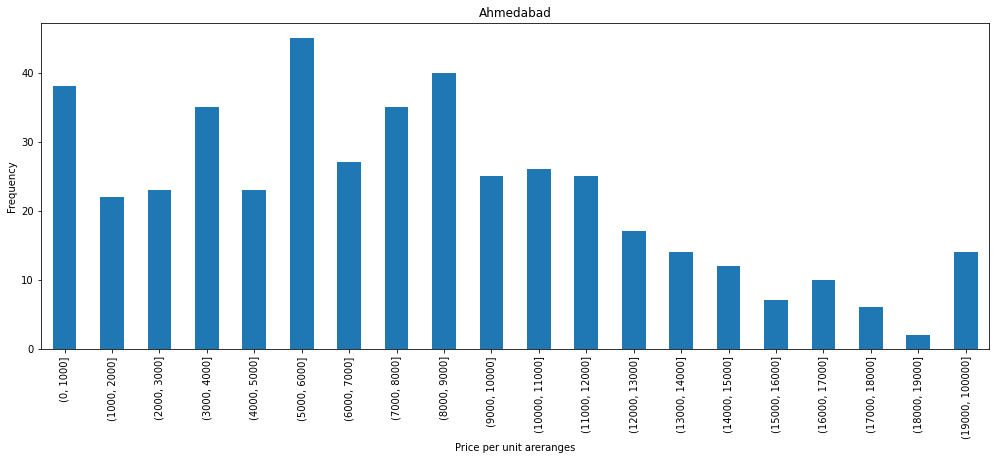

In [92]:
ranges5=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,100000]
dfg_ahmedabad=A1.groupby(pd.cut(A1['Price_per_unit_area'],ranges5)).count()['Price_per_unit_area']##cut according to the ranges
dfg_ahmedabad.plot(kind='bar', title='Ahmedabad', ylabel='Frequency',xlabel='Price per unit areranges', figsize=(17, 6))##plotting graph

In [93]:
M1=df.loc[(df['City_id']==18) & (df['is_Apartment']==0) & (df['is_studio']==0)]#Mumbai ##since the requirement given
## is search for offices. Therefore, it should be not a studio or apartment.
M1['Price_per_unit_area'].max()

99631

<AxesSubplot:title={'center':'Mumbai'}, xlabel='Price per unit area ranges', ylabel='Frequency'>

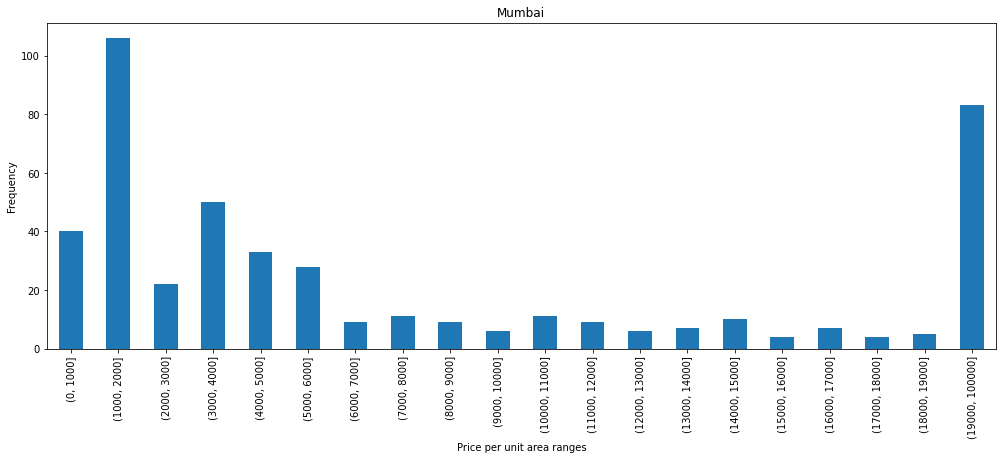

In [94]:
#ranges5=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,100000]
dfg_mumbai=M1.groupby(pd.cut(M1['Price_per_unit_area'],ranges5)).count()['Price_per_unit_area']##cut according to the ranges
dfg_mumbai.plot(kind='bar', title='Mumbai', ylabel='Frequency',xlabel='Price per unit area ranges', figsize=(17, 6))##plotting graph

### The above plots are made based on the price per unit area ranges v/s the frequency. The idea of hotspot used here is as follows: If the area or property is an hotspot, then the prices are likely to be higher for that property. Therefore, more the value of price per unit area better is the hotspot property available.

<AxesSubplot:title={'center':'Ahmedabad'}, xlabel='Locality name', ylabel='Frequency'>

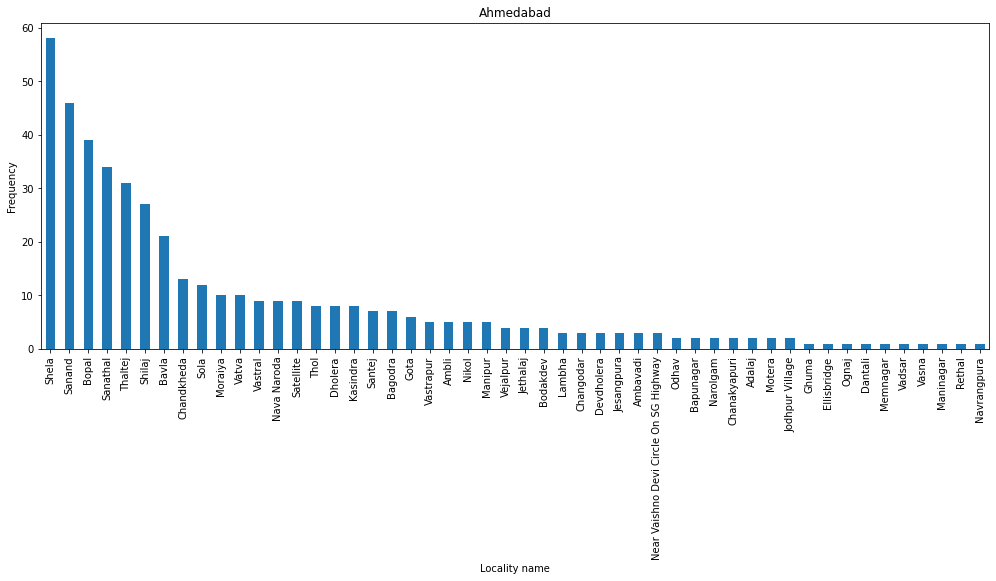

In [95]:
AD_1=A1.groupby(A1['Locality_Name']).size()  ##making and grouping a dataframe with different localities
AD_1=AD_1.sort_values(ascending=False)
AD_1.plot(kind='bar', title='Ahmedabad', ylabel='Frequency',xlabel='Locality name', figsize=(17, 6))#plot with localities v/s frequency

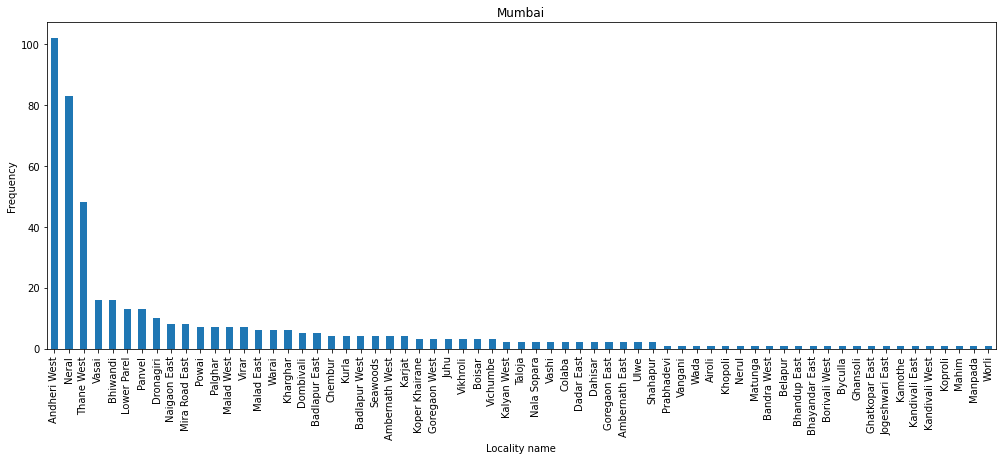

In [96]:
MB_1=M1.groupby(df['Locality_Name']).size()##making and grouping a dataframe with different localities
MB_1 = MB_1.sort_values(ascending=False)
MB_1.plot(kind='bar', title='Mumbai', ylabel='Frequency',xlabel='Locality name', figsize=(17, 6))##plot with localities v/s frequency
plt.show(

### The above two plots are made by the number of properties available in each locality. The idea of hotspot used here is as follows: Hotspots are the areas where more new properties are coming onto the market for sale. Therefore more the properties available for sale, the better the hotspot.